# Laboratorio di Simulazione Numerica

## Esercitazione 8

In questa esercitazione vogliamo applicare l'algoritmo di Metropolis per trovare la $\Psi(x)$ che rappresenta il ground state di un sistema quantistico sottoposto al potenziale 1-dimensionale
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Questo è un problema non risolvibile in modo esatto, quindi l'approccio numerico è di fatto inevitabile. Lo scopo dell'esercitazione, ed in particolare dei primi due esercizi, è di ricavare la funzione d'onda tramite metodi variazionali. Sappiamo infatti che la $\Psi_{GS}(x)$ del ground state sarà quella funzione d'onda che minimizza il valor medio di energia, ossia tale che:
$$
\langle \hat{H} \rangle = \frac{\langle \Psi|\hat{H}|\Psi \rangle}{\langle \Psi|\Psi \rangle} > \frac{\langle \Psi_{GS}|\hat{H}|\Psi_{GS} \rangle}{\langle \Psi_{GS}|\Psi_{GS} \rangle}
$$

Questa scrittura, evidentemente, vale anche nel caso in cui $\Psi(x)$ e $\Psi_{GS}(x)$ non siano normalizzate.

Nonostante il problema non sia risolvibile, possiamo immaginare la forma della funzione d'onda a partire dalle informazioni che abbiamo su $V(x)$. Questo è infatti una doppia buca di potenziale simmetrica. Ci aspettiamo dunque una funzione d'onda che abbia due picchi simmetrici in corrispondenza delle due buche. Un buon tentativo, per iniziare, è immaginare che la $\Psi(x)$ che cerchiamo abbia la seguente forma:

$$
\Psi^{\mu, \sigma} \propto  e^{-\frac{(x-\mu)^2}{2\sigma^2}}+ e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

ossia una sovrapposizione di due gaussiane, con due picchi di uguale larghezza data dalla deviazione standard $\sigma$ posizionati in $x = \pm \mu$. Partiremo dunque da questa funzione d'onda di prova per trovare i parametri $\mu$ e $\sigma$ che minimizzano l'energia.

### Esercizio 8.1

Lo scopo del primo esercizio è quello di scrivere un codice che possa campionare la funzione d'onda di prova $\Psi^{\mu, \sigma}$ tramite l'algoritmo di Metropolis, e, in seguito, sia in grado di calcolare il valor medio di energia 

$$
E = \langle \hat{H} \rangle = \frac{\langle \Psi^{\mu, \sigma}|\hat{H}|\Psi^{\mu, \sigma} \rangle}{\langle \Psi^{\mu, \sigma}|\Psi^{\mu, \sigma} \rangle}
$$

Scrivendo queste relazioni nella base delle coordinate si ottiene il seguente integrale:

$$
\langle {\hat H} \rangle = 
\frac{\int dx \Psi^*(x) {\hat H} \Psi(x)}
{\int dx |\Psi(x)|^2} = 
\int dx \frac{|\Psi(x)|^2}{\int dx |\Psi(x)|^2} \frac{{\hat H} \Psi(x)}{\Psi(x)}
$$

che può essere calcolato tramite metodi Monte Carlo, purchè si sia in grado di campionare la distribuzione di probabilità $|\Psi(x)|^2$ e si ricordi che:

$$
\hat{H}\Psi(x) = (\hat{T} + \hat{V})\Psi(x) = \big(-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x)\big)\Psi(x)
$$

Le simulazioni, di seguito, saranno eseguite per $\hbar = 1$ e $m = 1$.

Per il campionamento di $|\Psi(x)|^2$ si è sfruttato l'algoritmo di Metropolis, implementandolo direttamente nel main, mentre per il calcolo dell'integrale con le tecniche Monte Carlo si è sfruttata la **classe madre FunzioneBase**, nella quale si è definita una **classe figlia H_Psi** che, tramite il **metodo Eval**, prende in ingresso una funzione potenziale e restituisce il valore dell'hamiltoniana H valutata nel punto x. Il potenziale è passato alla classe tramite un puntatore a FunzioneBase in modo da poter usare la stessa classe per potenziali diversi. 

La classe H_Psi è pensata per restituire il valore di energia nel punto $x$ per uno stato di tipo gaussiano come quello di prova scritto nell'introduzione. Quindi ci sono due ulteriori membri privati della classe, che vengono dati in input nel main per chiamare il metodo Eval della classe, cioè il valor medio $\mu$ e la deviazione standard $\sigma$. 

Verifichiamo il funzionamento del codice andando ad eseguire un plot della funzione d'onda campionata nel caso in cui $\mu = 2$ e $\sigma = 1$. Verifichiamo anche il funzionamento del calcolo del valor medio di energia per uno stato di questo tipo.

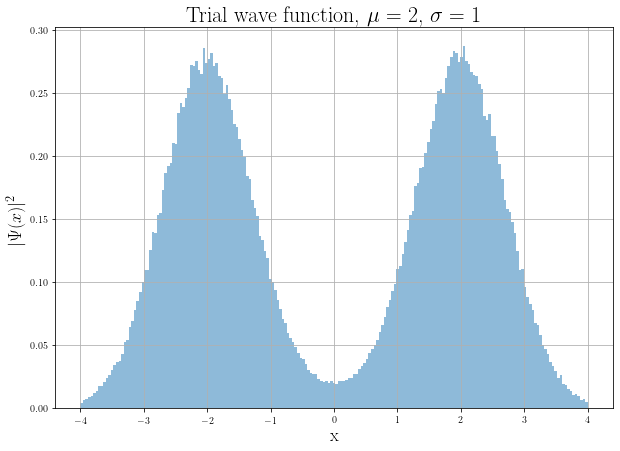

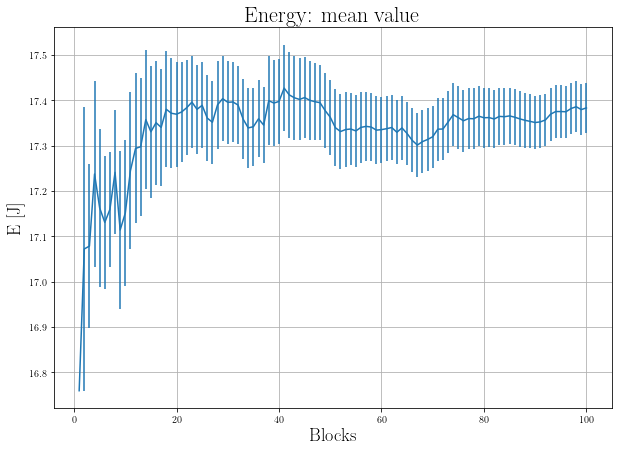

Energia media =  17.3832  J
Incertezza =  0.0559032  J


In [3]:
import matplotlib as mlab
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.stats import norm

plt.rc('text', usetex=True)
plt.rc('font', family='arial')

x = np.loadtxt("output_x_new.dat", unpack='true')
bins = np.linspace(-4, 4, 200)

x1 = np.loadtxt("output_E_new.dat", unpack='true', usecols=0)
y = np.loadtxt("output_E_new.dat", unpack='true', usecols=2)
y_err = np.loadtxt("output_E_new.dat", unpack='true', usecols=3)

plt.figure(figsize=(10, 7))
plt.hist(x, bins, alpha=0.5, density=True, label='N=1')
plt.xlabel('x', fontsize=18)
plt.ylabel('$|\Psi(x)|^2$', fontsize=18)
plt.title('Trial wave function, $\mu = 2$, $\sigma = 1$', fontsize=22)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.errorbar(x1, y, yerr=y_err)
plt.title('Energy: mean value', fontsize=22)
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('E [J]', fontsize=18)
plt.grid(True)

plt.show()

print('Energia media = ', y[-1], " J")
print('Incertezza = ', y_err[-1], " J")

### Esercizio 8.2

Lo scopo di questo secondo esercizio è quello di utilizzare il codice elaborato per il primo esercizio per trovare la funzione d'onda di ground state. L'idea è quella di andare a variare lentamente i parametri $\mu$ e $\sigma$ per trovare quelli che minimizzano l'energia media. Di seguito mostriamo un plot delle energie al variare dei parametri $\mu \in [0.78, .082]$ e $\sigma \in [0.59, 0.63]$.

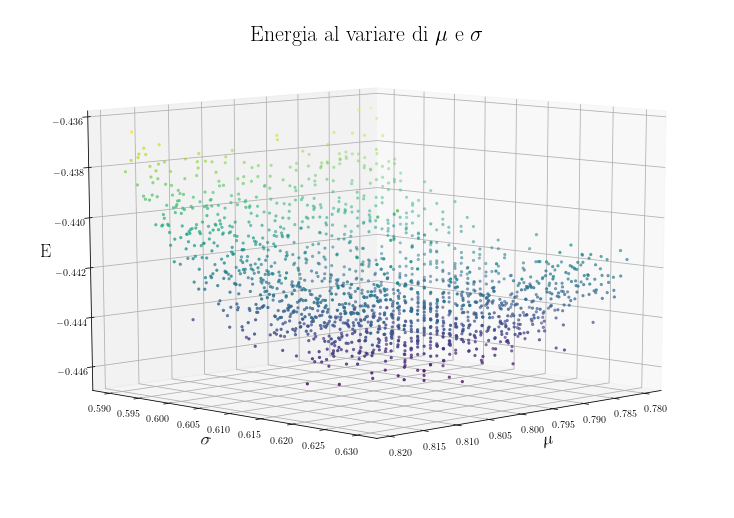

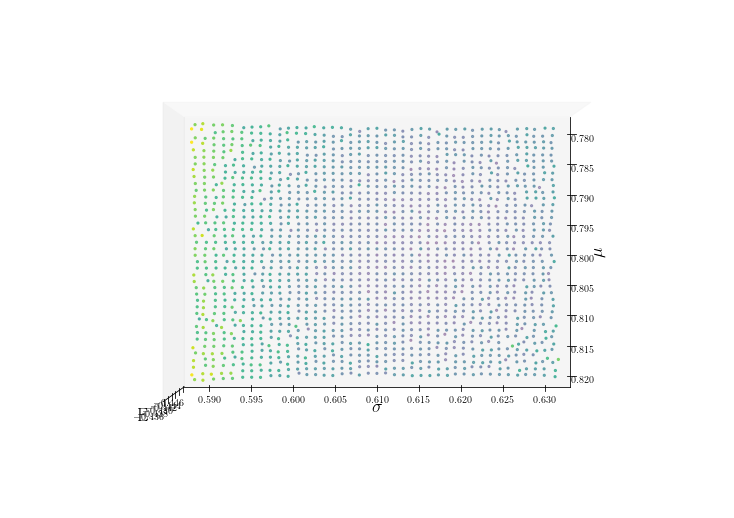

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X=np.loadtxt("output_Energia_precis.dat", unpack='true', usecols=0)
Y=np.loadtxt("output_Energia_precis.dat", unpack='true', usecols=1)
Z=np.loadtxt("output_Energia_precis.dat", unpack='true', usecols=2)

fig = plt.figure(figsize=(10,7))
fig2 = plt.figure(figsize=(10,7))
ax = Axes3D(fig)
ax2 = Axes3D(fig2)
ax.scatter(X, Y, Z, c=Z, marker='.')
#ax.plot_trisurf(X, Y, Z,
#                cmap='viridis', edgecolor='none');
ax2.scatter(X, Y, Z, c=Z, marker='.')

ax.set_xlabel('$\mu$', size=18)
ax.set_ylabel('$\sigma$', size=18)
ax.set_zlabel('E', size=18)
ax.set_title('Energia al variare di $\mu$ e $\sigma$', size=22)
ax.view_init(10, 45)

ax2.view_init(90,0)
ax2.set_xlabel('$\mu$', size=18)
ax2.set_ylabel('$\sigma$', size=18)
ax2.set_zlabel('E', size=18)
ax2.grid(False)

plt.show()

Dal grafico si vede che nel mantello 3D formato dall'energia media al variare di $\mu$ e $\sigma$ c'è un minimo. Questo è in corrispondenza dei parametri:
- $\mu = 0.805$
- $\sigma = 0.613$

Andando quindi a campionare la $|\Psi(x)|^2$ tramite il codice dell'esercizio 8.1, possiamo campionare la funzione d'onda in corrispondenza di questi precisi valori di $\sigma $ e $\mu$. Inoltre, tramite metodi computazionali, è possibile diagonalizzare l'hamiltoniana del sistema e quindi trovare una funzione d'onda di ground state da confrontare con quella da noi trovata con il metodo variazionale.

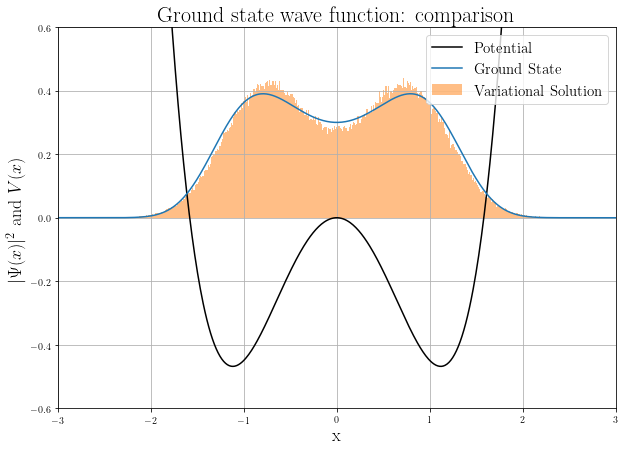

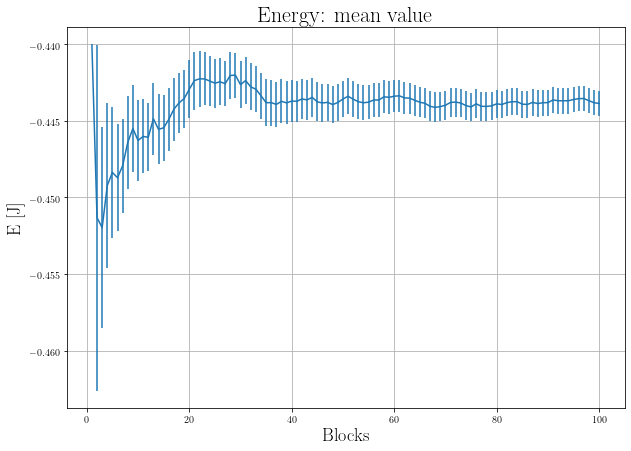

Energia di ground state con metodo computazionale:  -0.46046587969271563  J
Energia di ground state con metodo variazionale:  -0.443862  J
Incertezza:  0.000814468  J


In [4]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Histo with variational wave function
k = np.loadtxt("output_xprova.dat", unpack='true')
bins = np.linspace(-3, 3, 500)

# Energy with data blocking
x1 = np.loadtxt("output_E_aveprova.dat", unpack='true', usecols=0)
y = np.loadtxt("output_E_aveprova.dat", unpack='true', usecols=2)
y_err = np.loadtxt("output_E_aveprova.dat", unpack='true', usecols=3)

# Plot a few things
plt.figure(figsize=(10,7))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, label="Ground State")
plt.hist(k, bins, alpha=0.5, density=True, label='Variational Solution')
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.legend(loc='best', fontsize=15)
plt.title("Ground state wave function: comparison", fontsize=22)
plt.xlabel('x', fontsize=18)
plt.ylabel('$|\Psi(x)|^2$ and $V(x)$', fontsize=18)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.errorbar(x1, y, yerr=y_err)
plt.title('Energy: mean value', fontsize=22)
plt.xlabel('Blocks', fontsize=18)
plt.ylabel('E [J]', fontsize=18)
plt.grid(True)

plt.show();

print("Energia di ground state con metodo computazionale: ", E[0], " J")
print("Energia di ground state con metodo variazionale: ", y[-1], " J")
print("Incertezza: ", y_err[-1], " J")

Come si può vedere, il risultato ottenuto con il metodo variazionale non è compatibile con quello ottenuto computazionalmente, nemmeno entro l'errore statistico. Tuttavia si riscontra una buona somiglianza fra le funzioni d'onda campionate con i due metodi.